In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
%matplotlib inline

In [2]:
with open("datasets/train.json", encoding = "UTF8") as data_file:
    train_data = json.load(data_file)
with open("datasets/test.json", encoding = "UTF8") as data_file:
    test_data = json.load(data_file)
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

In [3]:
train_data["counts"] = train_data["ingredients"].apply(len)

In [4]:
np.amax(train_data["counts"])

65

In [5]:
train_data.head()

,cuisine,id,ingredients,counts
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20


In [6]:
train_new_data = pd.DataFrame({'Cuisine':pd.Series([], dtype='object'),
                   'Ingredient':pd.Series([], dtype='int')})

In [ ]:
i = 0
for idx in range(len(train_data)):
    for ingredient in train_data.loc[idx,"ingredients"]:
        train_new_data.loc[i,:] = [train_data.loc[idx,"cuisine"], ingredient]
        i += 1

In [ ]:
train_new_data.head()

In [ ]:
train_new_data.shape

In [ ]:
lists_counts = lists.value_counts()

In [105]:
for ingredient in lists_counts[0:10].index:
    train_data[ingredient] = 0

for row in range(len(train_data)):
    for ingredient in train_data.loc[row,"ingredients"]:
        if (ingredient in list(lists_counts[0:10].index)):
            train_data.loc[row,ingredient] += 1

In [209]:
train_new_data.head(30)

,cuisine,ingredient
0,greek,romaine lettuce
1,greek,black olives
2,greek,grape tomatoes
3,greek,garlic
4,greek,pepper
5,greek,purple onion
6,greek,seasoning
7,greek,garbanzo beans
8,greek,feta cheese crumbles
9,southern_us,plain flour


In [210]:
masks = train_new_data["ingredient"].isin(lists_counts[0:10].index)

In [214]:
np.sum(train_new_data.ingredient[masks] == "taco shells")

0

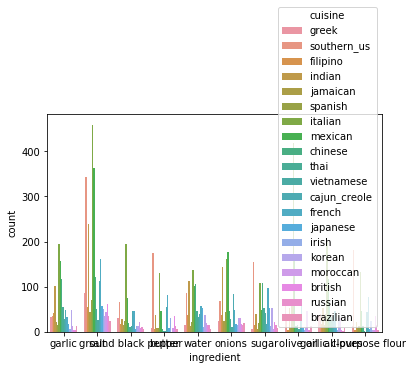

In [220]:
sns.countplot(x="ingredient", data = train_new_data[masks], hue="cuisine")

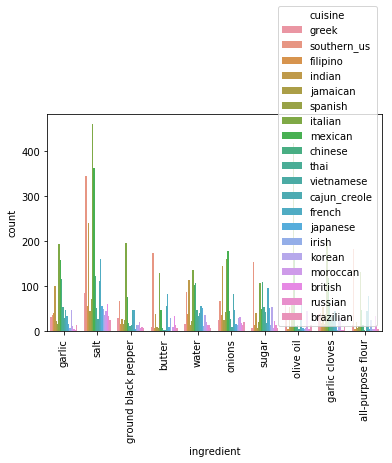

In [221]:
g = sns.countplot(x="ingredient", data = train_new_data[masks], hue="cuisine")
for x in g.get_xticklabels():
    x.set_rotation("vertical")

In [197]:
train_data.head()

,cuisine,id,ingredients,counts,aa,salt,olive oil,onions,water,garlic,sugar,garlic cloves,butter,ground black pepper,all-purpose flour
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,1,0,0,0,0,1,0,0,0,0,0
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,1,1,0,0,0,0,0,0,0,1,0
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,1,1,0,0,0,0,0,0,1,0,0
3,indian,22213,"[water, vegetable oil, wheat, salt]",4,1,1,0,0,1,0,0,0,0,0,0
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20,1,1,0,1,1,0,0,0,1,0,0


In [198]:
# from sklearn.model_selection import train_test_split as tts

y_col = "cuisine"
X_col = train_data.columns.drop([y_col,"id", "ingredients"])
# X_train, X_test, y_train, y_test = tts(train_new_data[X_col], train_new_data[y_col], test_size = 0.3, random_state = 42)
X_train, y_train = train_data[X_col], train_data[y_col]

In [199]:
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [200]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_lr, X_train, y_train, cv=3, scoring="accuracy")

array([0.28605896, 0.27815069, 0.28335346])

In [201]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [202]:
cross_val_score(model_rf, X_train, y_train, cv=3, scoring="accuracy")

array([0.26095152, 0.25514745, 0.25694235])